In [1]:
import matplotlib.pyplot as plt

# Result

- Last value

    - Mean Absolute Error (MAE): 12.23

    - Root Mean Squared Error (RMSE): 18.33

    - Symmetric Mean Absolute Percentage Error (sMAPE): 30.59

# Baseline

In [52]:
%run utils.ipynb

In [3]:
df_ori = load_data('df_19_24_cleaned')

In [4]:
df = df_ori.loc['2022': '2024',  ['price']]

In [5]:
train_df = df.loc['2022': '2023']
test_df = df.loc['2024': '2024']

In [7]:
adf_test(df['price'])

ADF Statistic: -5.698966
p-value: 0.000001
#Lags used: 48
Critical Value (1%): -3.430614
Critical Value (5%): -2.861657
Critical Value (10%): -2.566832


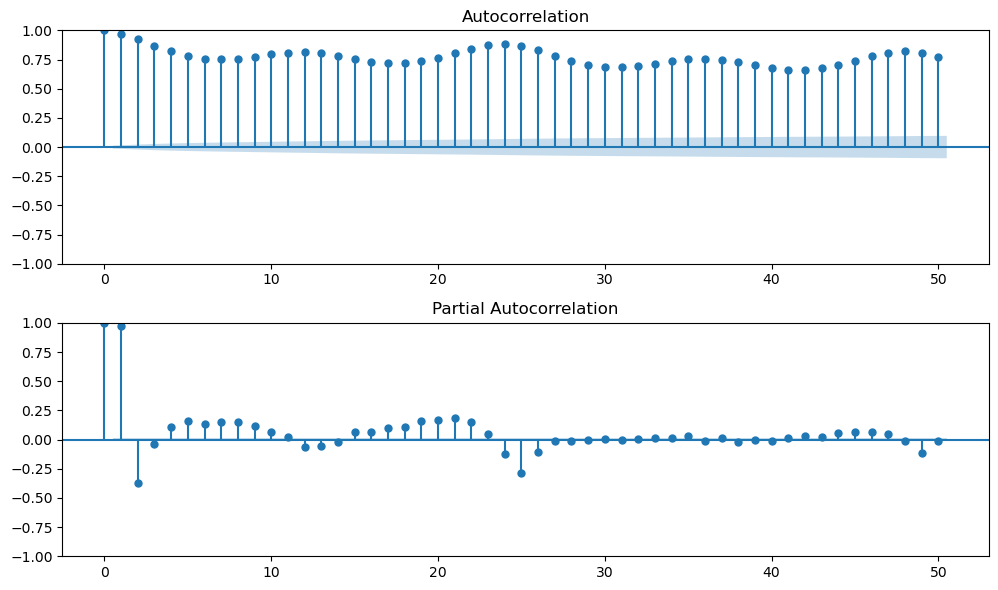

In [8]:
plot_acf_pacf(df['price'])

## Historical Mean

In [60]:
historical_mean = np.mean(train_df['price'])
historical_mean

168.87629851598174

In [61]:
test.loc[:,'pred_mean'] = historical_mean
test.head()

,price,pred_mean
2024-01-01 00:00:00,3.17,168.876299
2024-01-01 01:00:00,0.10,168.876299
2024-01-01 02:00:00,0.01,168.876299
2024-01-01 03:00:00,0.00,168.876299
2024-01-01 04:00:00,-0.01,168.876299


In [65]:
eva_s(test['price'], test['pred_mean'])

Mean Absolute Error (MAE): 99.07
Root Mean Squared Error (RMSE): 106.78
Symmetric Mean Absolute Percentage Error (sMAPE): 88.95


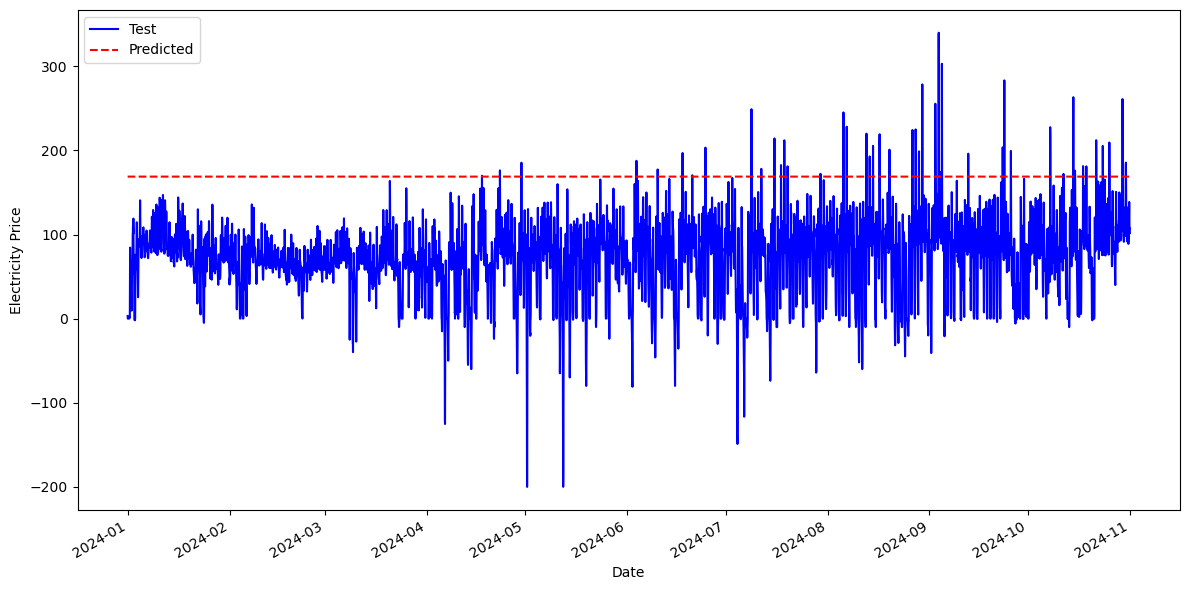

In [69]:
compare_preds(test['price'], test['pred_mean'])

## ARMA

In [112]:
from itertools import product
ps = range(0, 5, 1)
qs = range(0, 5, 1)

order_list = list(product(ps, qs))
print(order_list)

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


In [113]:
from typing import Union
from statsmodels.tsa.statespace.sarimax import SARIMAX

def optimize_ARMA(endog: Union[pd.Series, list], order_list: list) -> pd.DataFrame:
    
    results = []
    
    for order in order_list:
        print(order)
        try: 
            model = SARIMAX(endog, order=(order[0], 0, order[1]), simple_differencing=False).fit(disp=False)
        except:
            continue
            
        aic = model.aic
        results.append([order, aic])
        
    result_df = pd.DataFrame(results)
    result_df.columns = ['(p,q)', 'AIC']
    
    #Sort in ascending order, lower AIC is better
    result_df = result_df.sort_values(by='AIC', ascending=True).reset_index(drop=True)
    
    return result_df

In [114]:
result_df = optimize_ARMA(train_df['price'], order_list)
result_df

(0, 0)
(0, 1)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 2)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 3)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(0, 4)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(1, 0)
(1, 1)
(1, 2)
(1, 3)
(1, 4)
(2, 0)
(2, 1)
(2, 2)
(2, 3)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(2, 4)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


(3, 0)
(3, 1)
(3, 2)
(3, 3)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(3, 4)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 0)
(4, 1)
(4, 2)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 3)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


(4, 4)


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


,"(p,q)",AIC
0,"(4, 3)",163152.841778
1,"(4, 4)",163935.123414
2,"(3, 3)",163943.888920
3,"(3, 2)",164254.746255
4,"(4, 1)",164279.009358
5,"(4, 2)",165255.430749
6,"(4, 0)",166414.101745
7,"(1, 4)",166437.876017
8,"(3, 4)",166474.770423
9,"(2, 3)",166488.909114


In [120]:
model_ARMA = SARIMAX(train_df['price'], order=(4,0,3), simple_differencing=False)
model_ARMA_fit = model_ARMA.fit(disp=False)
print(model_ARMA_fit.summary())


/Users/libin/anaconda3/envs/th/lib/python3.10/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  price   No. Observations:                17520
Model:               SARIMAX(4, 0, 3)   Log Likelihood              -81568.421
Date:                Wed, 13 Nov 2024   AIC                         163152.842
Time:                        11:03:44   BIC                         163215.011
Sample:                    01-01-2022   HQIC                        163173.313
                         - 12-31-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.7229      0.001   2254.824      0.000       1.721       1.724
ar.L2          0.0094      0.001     12.568      0.000       0.008       0.011
ar.L3         -1.7234      0.001  -2266.517      0.0

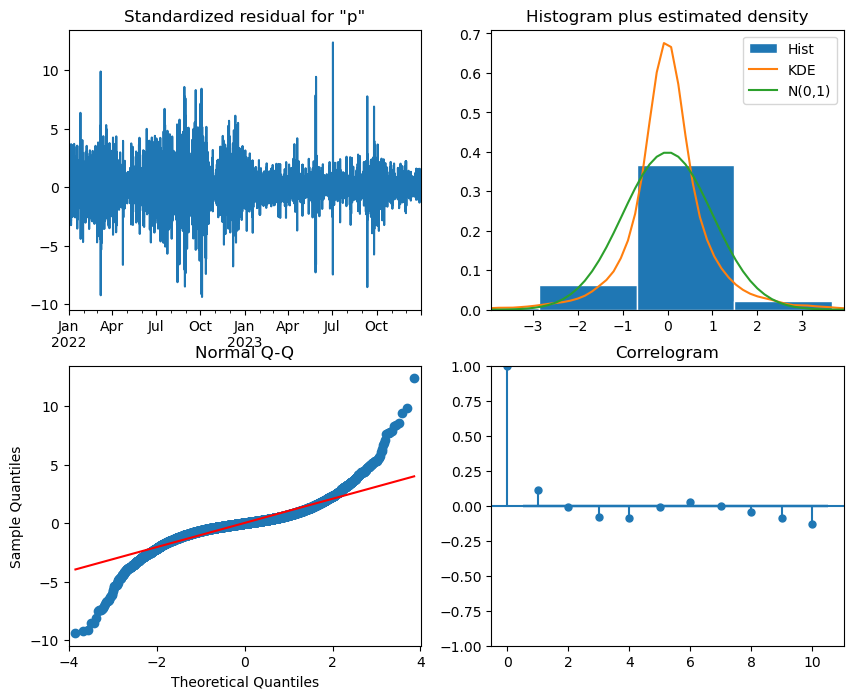

In [121]:
model_ARMA_fit.plot_diagnostics(figsize=(10, 8));

In [129]:
from statsmodels.stats.diagnostic import acorr_ljungbox

residuals = model_ARMA_fit.resid

v = acorr_ljungbox(residuals, np.arange(1, 11, 1))

print(v['lb_pvalue'])

1      5.626858e-49
2      7.776892e-48
3      3.005667e-70
4      2.522583e-96
5      1.969271e-95
6      1.651524e-96
7      1.499889e-95
8     7.583760e-103
9     1.137836e-129
10    2.314559e-190
Name: lb_pvalue, dtype: float64


In [132]:
def rolling_forecast(df: pd.DataFrame, train_len: int, horizon: int, window: int, method: str) -> list:
    
    total_len = train_len + horizon
    end_idx = train_len
    
    if method == 'mean':
        pred_mean = []
        
        for i in range(train_len, total_len, window):
            mean = np.mean(df[:i].values)
            pred_mean.extend(mean for _ in range(window))
            
        return pred_mean

    elif method == 'last':
        pred_last_value = []
        
        for i in range(train_len, total_len, window):
            last_value = df[:i].iloc[-1].values[0]
            pred_last_value.extend(last_value for _ in range(window))
            
        return pred_last_value
    
    elif method == 'ARMA':
        pred_ARMA = []
        
        for i in range(train_len, total_len, window):
            model = SARIMAX(df[:i], order=(4,0,3))
            res = model.fit(disp=False)
            predictions = res.get_prediction(0, i + window - 1)
            oos_pred = predictions.predicted_mean.iloc[-window:]
            pred_ARMA.extend(oos_pred)
            
        return pred_ARMA

In [ ]:
TRAIN_LEN = len(train_df)
HORIZON = len(test_df)
WINDOW = 24

pred_mean = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'mean')
pred_last_value = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'last')
pred_ARMA = rolling_forecast(df, TRAIN_LEN, HORIZON, WINDOW, 'ARMA')

test.loc[:, 'pred_mean'] = pred_mean
test.loc[:, 'pred_last_value'] = pred_last_value
test.loc[:, 'pred_ARMA'] = pred_ARMA

test.head()

## Last value

In [6]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 17520 entries, 2022-01-01 00:00:00 to 2023-12-31 23:00:00
Freq: h
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   17520 non-null  float64
dtypes: float64(1)
memory usage: 273.8 KB


In [8]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7321 entries, 2024-01-01 00:00:00 to 2024-11-01 00:00:00
Freq: h
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   7321 non-null   float64
dtypes: float64(1)
memory usage: 114.4 KB


In [9]:
X_train, y_train = create_sequences(train_df)

In [11]:
X_test, y_test = create_sequences(test_df)

In [22]:
y_pred = X_test[:, -1,:].reshape(-1)

In [23]:
eva_s(y_test, y_pred)

Mean Absolute Error (MAE): 12.23
Root Mean Squared Error (RMSE): 18.33
Symmetric Mean Absolute Percentage Error (sMAPE): nan


/var/folders/8k/8n8mf6jn28537sc4vvz36rhh0000gn/T/ipykernel_4347/3432681331.py:12: RuntimeWarning: invalid value encountered in divide
  return 100 * np.mean(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


In [48]:
eva_s(y_test, y_pred+0.0000001)

Mean Absolute Error (MAE): 12.23
Root Mean Squared Error (RMSE): 18.33
Symmetric Mean Absolute Percentage Error (sMAPE): 30.59


## Simple LSTM

In [75]:
df_ori = load_data('df_actual_22_24_cleaned')

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 24840 entries, 2022-01-01 01:00:00 to 2024-11-01 00:00:00
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   price                    24840 non-null  float64
 1   solar                    24840 non-null  int64  
 2   wind_onshore             24840 non-null  int64  
 3   wind_offshore            24840 non-null  int64  
 4   total_load               24840 non-null  int64  
 5   actual_solar             24840 non-null  int64  
 6   actual_wind_onshore      24840 non-null  int64  
 7   actual_wind_offshore     24840 non-null  int64  
 8   actual_fossil_gas        24840 non-null  int64  
 9   actual_fossil_hard_coal  24840 non-null  int64  
dtypes: float64(1), int64(9)
memory usage: 2.1 MB
None


In [76]:
df_ori = df_ori[['price']]

In [77]:
train_df = df_ori['2022': '2023']
test_df = df_ori['2024': '2024']

In [78]:
train_df[:5]

,price
2022-01-01 01:00:00,124.70
2022-01-01 02:00:00,124.70
2022-01-01 03:00:00,134.00
2022-01-01 04:00:00,58.80
2022-01-01 05:00:00,37.67


In [83]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten, Input
from keras.callbacks import EarlyStopping
from sklearn.metrics import mean_absolute_error, mean_squared_error
from keras.optimizers import Adam
# # Assuming 'df' is your dataframe with 'price' and a DateTime index
# # Filter and split data into training and test sets
# train_data = df['2022':'2023'][['price']].values
# test_data = df['2024'][['price']].values

# Scale data between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_train = scaler.fit_transform(train_df)
scaled_test = scaler.transform(test_df)

# Create sequences for the training set
sequence_length = 24
X_train, y_train = [], []

for i in range(sequence_length, len(scaled_train)):
    X_train.append(scaled_train[i - sequence_length:i, 0])
    y_train.append(scaled_train[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

# Build the LSTM model
# model_basic_LSTM = Sequential()
# model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# model.add(LSTM(units=50))
# model.add(Dense(units=1))
model_basic_LSTM = Sequential([
        Input(shape=(X_train.shape[1], X_train.shape[2])),
        LSTM(units=64, return_sequences=True),
        LSTM(units=32, return_sequences=False),
        Dense(units=1)
    ])

# Compile the model
model_basic_LSTM.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

model_basic_LSTM.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                   │ (None, 24, 64)         │        16,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_3 (LSTM)                   │ (None, 32)             │        12,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 29,345 (114.63 KB)

 Trainable params: 29,345 (114.63 KB)

 Non-trainable params: 0 (0.00 B)

In [84]:
# Train the model
model_basic_LSTM.fit(X_train, y_train, epochs=20, batch_size=32)

# Prepare the test set sequences
X_test, y_test = [], []

# Use scaled_test for creating sequences in the test set
for i in range(sequence_length, len(scaled_test)):
    X_test.append(scaled_test[i - sequence_length:i, 0])
    y_test.append(scaled_test[i, 0])

X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

# Predict on test set
predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)  # Rescale to original values

# Rescale the actual test prices for comparison
actual_price = scaler.inverse_transform(scaled_test[sequence_length:])


Epoch 1/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step - loss: 0.0114
Epoch 2/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 0.0018
Epoch 3/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 8.0270e-04
Epoch 4/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 4.7231e-04
Epoch 5/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 4.1758e-04
Epoch 6/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 4.0471e-04
Epoch 7/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.9277e-04
Epoch 8/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 3.8868e-04
Epoch 9/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.6939e-04
Epoch 10/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 3.6965e-04
Epoch 11/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.4802e-04
Epoch 12/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 13ms/step - loss: 3.7464e-04
Epoch 13/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 7s 12ms/step - loss: 3.7641e-04
Epoch 14/20
547/547 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 3.5196

In [85]:
eva_s(actual_price, predicted_price)

Mean Absolute Error (MAE): 10.25
Root Mean Squared Error (RMSE): 14.81
Symmetric Mean Absolute Percentage Error (sMAPE): 27.66


(10.247834756549489, 14.809752857880257, 27.66336105306568)

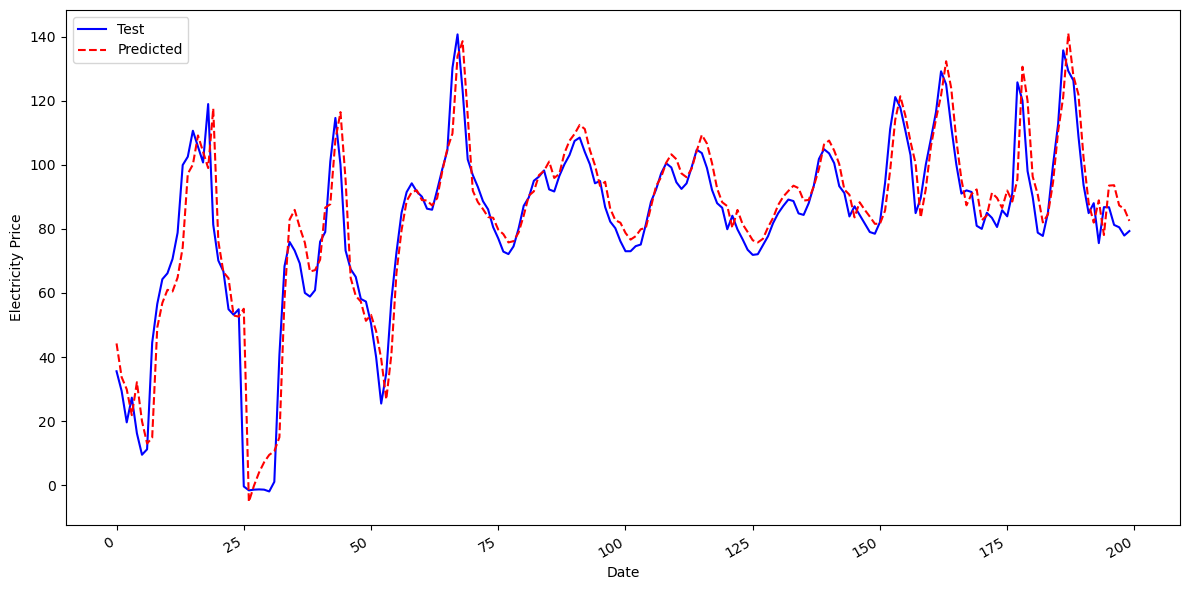

In [87]:
compare_preds(actual_price[:200], predicted_price[:200])